In [1]:
import os
import kernal_env_helper as keh

keh.python_version()
keh.which_python()
keh.pip_list()
keh.export_requirements()

Kernel Version of Python is Python 3.13.5

Python path: C:\Users\antho\python_envs\env_3_13_base\Scripts\python.exe
Package                 Version
----------------------- -----------
asttokens               3.0.0
colorama                0.4.6
comm                    0.2.2
contourpy               1.3.2
cycler                  0.12.1
debugpy                 1.8.15
decorator               5.2.1
executing               2.2.0
fonttools               4.59.0
ipykernel               6.29.5
ipython                 9.4.0
ipython_pygments_lexers 1.1.1
jedi                    0.19.2
joblib                  1.5.1
jupyter_client          8.6.3
jupyter_core            5.8.1
kiwisolver              1.4.8
matplotlib              3.10.3
matplotlib-inline       0.1.7
nest-asyncio            1.6.0
numby                   0.2.0
numpy                   2.3.1
packaging               25.0
pandas                  2.3.1
parso                   0.8.4
pillow                  11.3.0
pip                     25.1.1

# Import

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PolynomialFeatures, StandardScaler
from sklearn.base import clone

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.model_selection import train_test_split, cross_validate, RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV, TunedThresholdClassifierCV

from sklearn.metrics import log_loss, accuracy_score, average_precision_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, brier_score_loss, balanced_accuracy_score, cohen_kappa_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, RocCurveDisplay, DetCurveDisplay
from sklearn.metrics import classification_report  

import sys

## filter out warning to make sure output does not get to large
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    

# Custom Helper Module

In [3]:
#Supervised Helper Module Load
import supervised_helper as slh


# Load Data and View

In [4]:
#specify directory of data file (currently same directory as this python file)
data_dir = "./"       
data_file = 'cell_plan_cancellations.csv'
#append file names, os.join ensures correct brackets / or \ when joining
full_file_name = os.path.join(data_dir, data_file)

# Load data
df = pd.read_csv(full_file_name) 

# Data exploration
print(df.info())  # type of each variable
print(df.shape)  # How many rows and columns?
print(df.columns)  # What are variable names
print(df.head())  # Show me a few lines
print(df.describe())
print(df.isna().sum())  # Any missing data/NA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 0 to 1076
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerAge    1077 non-null   int64  
 1   Married        1077 non-null   object 
 2   HouseholdSize  1077 non-null   int64  
 3   AccountAge     1077 non-null   int64  
 4   PaymentMethod  1077 non-null   object 
 5   LastNewPhone   1077 non-null   int64  
 6   BasePlan       1077 non-null   object 
 7   IntlPlan       1077 non-null   object 
 8   Deal           1077 non-null   object 
 9   CustServCall   1077 non-null   int64  
 10  NumVmail       1077 non-null   int64  
 11  NumText        1077 non-null   int64  
 12  NumApps        1077 non-null   int64  
 13  DayMin         1077 non-null   float64
 14  DayCall        1077 non-null   int64  
 15  DayCharge      1077 non-null   float64
 16  EveMin         1077 non-null   float64
 17  EveCall        1077 non-null   int64  
 18  EveCharg

# Load Test Data and Verify Test Data Matches Training Data (from Test CSV File)

In [5]:
#specify directory of data file (currently same directory as this python file)
data_dir = "./"       
data_file = 'cell_plan_cancellations_test.csv'
#append file names, os.join ensures correct brackets / or \ when joining
full_file_name = os.path.join(data_dir, data_file)

# Load data
TEST = pd.read_csv(full_file_name) 

# Data exploration
print(TEST.info())  # type of each variable
print(TEST.shape)  # How many rows and columns?
print(TEST.isna().sum())  # Any missing data/NA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerAge    322 non-null    int64  
 1   Married        322 non-null    object 
 2   HouseholdSize  322 non-null    int64  
 3   AccountAge     322 non-null    int64  
 4   PaymentMethod  322 non-null    object 
 5   LastNewPhone   322 non-null    int64  
 6   BasePlan       322 non-null    object 
 7   IntlPlan       322 non-null    object 
 8   Deal           322 non-null    object 
 9   CustServCall   322 non-null    int64  
 10  NumVmail       322 non-null    int64  
 11  NumText        322 non-null    int64  
 12  NumApps        322 non-null    int64  
 13  DayMin         322 non-null    float64
 14  DayCall        322 non-null    int64  
 15  DayCharge      322 non-null    float64
 16  EveMin         322 non-null    float64
 17  EveCall        322 non-null    int64  
 18  EveCharge 

# Plot Data

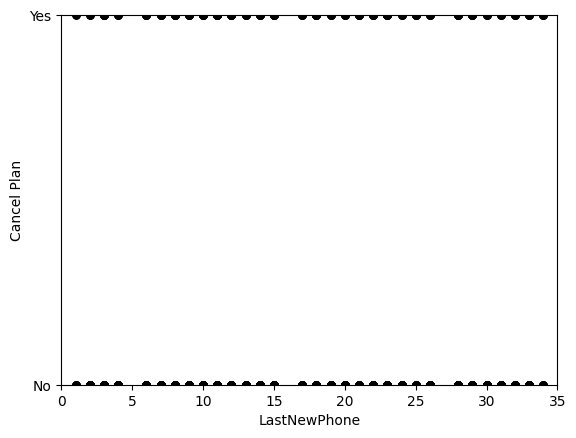

In [6]:
# Plotting
X_raw=df['LastNewPhone']
y_raw=df['Cancel']

plt.scatter(X_raw,y_raw, c='black', s=25, marker='o')
plt.xlabel('LastNewPhone')
plt.ylabel('Cancel Plan')
plt.xlim(0,35)
plt.ylim(0,1)
plt.show()

# Define Response and Train/Test Split Data

In [7]:
#name of response variable
y_string = 'Cancel'

#to start all variables other than the response are options for predictions (X)
X = df.drop(columns=y_string)
y = df[y_string]

#Label Encoder needed to turn categorical response variable into categorical values {0,1} in this case
lb=LabelEncoder()
lb.fit(y)
lb.classes_=np.asarray(['No','Yes'])
y=lb.transform(y)

# Split data into training and validation sets
#random state is just an arbitrary integer to get the same results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y, random_state=824)

#train values
print("Train data info")
print(X_train.shape)  # How many rows and columns?
print(X_train.head())  # Show me a few lines
print("y train shape:", y_train.shape)
print("")
print("Test  data info")
print(X_test.shape)  # How many rows and columns
print(X_test.head())  # Show me a few lines
print("y test shape:", y_test.shape)

Train data info
(861, 28)
     CustomerAge   Married  HouseholdSize  AccountAge PaymentMethod  \
798           63    single              1         140     Automatic   
316           35  divorced              5          87     Automatic   
490           57    single              4         107     Automatic   
23            29   married              4          19     Automatic   
86            52   married              2          49     Automatic   

     LastNewPhone  BasePlan IntlPlan Deal  CustServCall  ...  EveCharge  \
798            21    deluxe       No  Yes             1  ...       9.75   
316            12  standard      Yes   No             1  ...       4.61   
490            33    deluxe       No  Yes             4  ...      11.46   
23              7  standard       No  Yes             0  ...      16.87   
86             21  standard       No   No             1  ...       7.59   

     NightMin  NightCall  NightCharge  IntlMin  IntlCall  IntlCharge  DayData  \
798     187.8  

# Preliminaries (Models, Scaling, Where to store results, and Scoring metrics)

In [8]:
#Dummy Model
dumb_model=DummyClassifier(strategy="prior")

#Logistic Regression (no penalty / regulization)
log_model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000, warm_start = True, n_jobs=-1)

#SFS
#the sequential selector needs a model (in this case logistics  regression).  The n_features_to_select option tells how many features 
#to choose. if auto  keeps adding more until the log-loss improvemetn is less than tol
#in this case tol chosen arbitrarily. In practice we could tune SFS, but will not do for this problem
tol = 0.02
sfs = SequentialFeatureSelector(log_model, n_features_to_select='auto', scoring='neg_log_loss',  tol=tol)

#the solver for  elasticnet and other models has random aspects to it 
rng = np.random.RandomState(562)

#elasticnet logistic regression model
ela_logreg = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=1000, warm_start = True, n_jobs=-1, random_state=rng)

#elasticnet logistic regression model
#input list of rhos and 30 C values betwen 10-4 and 10^4
rho_list = [.05, .25, .5, .75, .95]
ela_cv = LogisticRegressionCV(penalty='elasticnet', Cs=30, l1_ratios=rho_list, 
                              scoring='neg_log_loss', solver='saga', max_iter=1000, random_state=rng, n_jobs=-1)


#knn classifier (N initially set to 5, will tune later)
knn_class =  KNeighborsClassifier(n_neighbors=5,  metric='euclidean')

# Cart classifier model.  Will tune hyperparameter later
cart_class =  tree.DecisionTreeClassifier(criterion='gini',splitter='best', random_state=rng)

#RF Model.  Will tune hyperparamter later
#the out of bag (oob) error is useful comparison to crossvalidation error
rf_class =  RandomForestClassifier(n_estimators=200, criterion='gini', bootstrap=True, oob_score=True, max_features='sqrt',
                                   random_state=rng, n_jobs = -1)

#GBM Model.  Will tune hyperparamters later
gbm_class =  GradientBoostingClassifier(random_state=rng)

#Scaling (need for logistic regression)
scaler=StandardScaler()

#Where final results will be stored
all_results = {}

#ScoringMetrics
scoring =['neg_log_loss', 'neg_brier_score', 'roc_auc', 'average_precision',  
          'accuracy','precision', 'recall', 'f1', 'balanced_accuracy']


# Cross Validation Setup

In [9]:
# Cross-validation using Strafied K Fold. For logistical Regression
rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=543)


# Preprocessing

In [10]:
# Example code for later:
# Columns to keep. in this case we want everything (will change in code later)
#cols_2_drop =['']
#cols_2_keep = [col for col in X_train.columns  if col not in cols_2_drop] 

''' 
See supervised_helper.py for definition of these functions:
def polynomial_transform(poly_features, degree)
def cross_validation_summary(cv_results, scoring)
def hypertuning_summary(search,scoring,primary_metric)
def compute_binary_class_metric(y_test, pred_prob, pred_class)
used throughought the rest of this workbook
'''
# Preprocessing step to keep categorical features 
def preprocessor(cols_2_keep):
    # Identify categorical features,. in this case we will drop these 
    categorical_features = X_train[cols_2_keep].select_dtypes(include=['object']).columns.tolist()
 
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(), categorical_features),
            ('keep_vars', 'passthrough', [col for col in cols_2_keep  if col not in categorical_features]) 
        ],
        verbose_feature_names_out = False,  #nicer formatting with column names on transformed dataset
        remainder='drop'  # drop everything else

    ) 
    return preprocessor

#Preprocessing step for no categorical features:
def preprocessor_no_cat(cols_2_keep):
    # Identify categorical features,. in this case we will drop these 
    categorical_features = X_train[cols_2_keep].select_dtypes(include=['object']).columns.tolist()
    
    #drop name and cateogrical
    cols_2_keep = [col for col in X_train.columns  if col not in cols_2_drop and col not in categorical_features]
    
    preprocessor_no_cat = ColumnTransformer(
        transformers=[
           ('keep_vars', 'passthrough', [col for col in cols_2_keep ]) 
        ],
        verbose_feature_names_out = False,  #nicer formatting with column names on transformed dataset
        remainder='drop'  # drop everything else
    ) 
    return preprocessor_no_cat

#Preprocessiong for poly nomial regression
def preprocessor_poly(degree,cols_2_keep):
    # Identify categorical features,. in this case we will drop these 
    categorical_features = X_train[cols_2_keep].select_dtypes(include=['object']).columns.tolist()

    #the polynomial features are all the numeric features
    poly_features = X_train[cols_2_keep].select_dtypes(exclude=['object']).columns.tolist()
    
    #first define the one hot encoder for categorical and numberical terms for polynomial terms
    transformers=[
            ('cat', OneHotEncoder(), categorical_features),
            ('select_vars', 'passthrough', [col for col in cols_2_keep if col not in categorical_features and col not in poly_features]) 
        ]

    #Transform the numberical variables to allow for polynomial terms
    degree=degree

    poly = slh.polynomial_transform(poly_features, degree)

    transformers=transformers + poly

    # Preprocessing step: Select specific columns
    #transform the categorical variables to 0/1 via one hot encoding
    #transform the numerical variables with polynomial terms
    #keep remaining variables as is (in this case none) 
    preprocessor_poly = ColumnTransformer(
        transformers,
        verbose_feature_names_out = False,  #nicer formatting with column names on transformed dataset
        remainder='drop'  # drop everything else
    )
    return preprocessor_poly
    
#interaction transformer for use when looking at interactions during regression
int_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)


# Models To Evaluate

Basic Models:
1) Dumb
2) Logistic (2x variables)
3) Logistic (All with no interactions)
4) Logistic (All with interactions)
5) Quadriatic
6) Cubic

Regulization Models:

7) SFS
8) Elastic (all with no interactions)
9) Elastic (all with interactions)
10) Elastic (quadriatic)
11) Elastic (Cubic)

Other Models:
    
12) KNN
13) CART
14) Random Forest
15) Boosting

Run only on the training set of data


## 1) Dummy Model

In [11]:
print("Dummy model:")

#call crossvalidate
cv_results = cross_validate(dumb_model, X_train, y_train, cv=rkf, scoring=scoring, n_jobs=-1)

#store results
all_results['dummy'] = slh.cross_validation_summary(cv_results, scoring)


Dummy model:
neg_log_loss -0.6228492950696577
neg_brier_score -0.2156826021014048
roc_auc 0.5
average_precision 0.3147466057265761
accuracy 0.6852533942734239
precision 0.0
recall 0.0
f1 0.0
balanced_accuracy 0.5


## 2) Logistic (no cat)

In [12]:
# Columns to keep. in this case we want everything (will change in code later)
cols_2_drop =['']
cols_2_keep = [col for col in X_train.columns  if col not in cols_2_drop]

# Create a pipeline with preprocessing, scaling, and logistic Regression
log_no_cat_mod = Pipeline(steps=[
    ('preprocessor', preprocessor_no_cat(cols_2_keep)),
    ('scaler', scaler),
    ('model', log_model)
])

#clone model for later use
log_no_cat_mod=clone(log_no_cat_mod)

print('Log No Cat:')
#call crossvalidate
cv_results = cross_validate(log_no_cat_mod, X_train, y_train, cv=rkf, scoring=scoring, n_jobs=-1)

#store results
all_results['log_no_cat_mod'] =slh.cross_validation_summary(cv_results, scoring)

#spit out  predictors
print('')
print('Predictors')
print(log_no_cat_mod[:-1].fit(X_train,y_train).get_feature_names_out())
                                                

Log No Cat:
neg_log_loss -0.4780271700587451
neg_brier_score -0.15469136448258228
roc_auc 0.813105822823337
average_precision 0.7016817828175412
accuracy 0.7800869292467625
precision 0.6932754296793079
recall 0.5472727272727274
f1 0.6097548061403467
balanced_accuracy 0.7171391884951209

Predictors
['CustomerAge' 'HouseholdSize' 'AccountAge' 'LastNewPhone' 'CustServCall'
 'NumVmail' 'NumText' 'NumApps' 'DayMin' 'DayCall' 'DayCharge' 'EveMin'
 'EveCall' 'EveCharge' 'NightMin' 'NightCall' 'NightCharge' 'IntlMin'
 'IntlCall' 'IntlCharge' 'DayData' 'EveData' 'NightData']


## 3) Logistic (all no interaction)

In [13]:
# Columns to keep. in this case we want everything 
cols_2_drop =['']
cols_2_keep = [col for col in X_train.columns  if col not in cols_2_drop]

# Create a pipeline with preprocessing(no cat), scaling, and logistic Regression
log_all_mod = Pipeline(steps=[
    ('preprocessor', preprocessor(cols_2_keep)),
    ('scaler', scaler),
    ('model', log_model)
])

#clone model for later use
log_all_mod=clone(log_all_mod)

print('Log All No Interactions:')
#call crossvalidate
cv_results = cross_validate(log_all_mod, X_train, y_train, cv=rkf, scoring=scoring, n_jobs=-1)

#store results
all_results['log_all_mod'] = slh.cross_validation_summary(cv_results, scoring)

#spit out  predictors
print('')
print('Predictors')
print(log_all_mod[:-1].fit(X_train,y_train).get_feature_names_out())


Log All No Interactions:
neg_log_loss -0.368338287549719
neg_brier_score -0.11268234923273916
roc_auc 0.9053780745306169
average_precision 0.8089347734005725
accuracy 0.846679661244791
precision 0.787763918813505
recall 0.704668911335578
f1 0.7422587380146141
balanced_accuracy 0.8082666590576195

Predictors
['Married_divorced' 'Married_married' 'Married_single'
 'PaymentMethod_Automatic' 'PaymentMethod_Check' 'PaymentMethod_Credit'
 'BasePlan_deluxe' 'BasePlan_economy' 'BasePlan_standard' 'IntlPlan_No'
 'IntlPlan_Yes' 'Deal_No' 'Deal_Yes' 'CustomerAge' 'HouseholdSize'
 'AccountAge' 'LastNewPhone' 'CustServCall' 'NumVmail' 'NumText' 'NumApps'
 'DayMin' 'DayCall' 'DayCharge' 'EveMin' 'EveCall' 'EveCharge' 'NightMin'
 'NightCall' 'NightCharge' 'IntlMin' 'IntlCall' 'IntlCharge' 'DayData'
 'EveData' 'NightData']


## 4) Logistic (All with interactions)

In [14]:
# Columns to keep. in this case we want everything 
cols_2_drop =['']
cols_2_keep = [col for col in X_train.columns  if col not in cols_2_drop]

# Create a pipeline with preprocessing, interaction transformer, scaling, and logistic Regression
log_int_mod = Pipeline(steps=[
    ('preprocessor', preprocessor(cols_2_keep)),
    ('int',int_transformer),
    ('scaler', scaler),
    ('model', log_model)
])

log_int_mod=clone(log_int_mod)

print('Log All w/ Interactions:')
#call crossvalidate
cv_results = cross_validate(log_int_mod, X_train, y_train, cv=rkf, scoring=scoring, n_jobs=-1)

#store results
all_results['log_int_mod'] =slh.cross_validation_summary(cv_results, scoring)

#spit out  predictors
print('')
print('Predictors')
print(log_int_mod[:-1].fit(X_train,y_train).get_feature_names_out())


Log All w/ Interactions:
neg_log_loss -5.303051884883274
neg_brier_score -0.18838079157802848
roc_auc 0.8572723468203696
average_precision 0.7452470632334338
accuracy 0.8087310122328272
precision 0.6966704109132985
recall 0.6972615039281708
f1 0.6942902307281936
balanced_accuracy 0.778574254788944

Predictors
['Married_divorced' 'Married_married' 'Married_single'
 'PaymentMethod_Automatic' 'PaymentMethod_Check' 'PaymentMethod_Credit'
 'BasePlan_deluxe' 'BasePlan_economy' 'BasePlan_standard' 'IntlPlan_No'
 'IntlPlan_Yes' 'Deal_No' 'Deal_Yes' 'CustomerAge' 'HouseholdSize'
 'AccountAge' 'LastNewPhone' 'CustServCall' 'NumVmail' 'NumText' 'NumApps'
 'DayMin' 'DayCall' 'DayCharge' 'EveMin' 'EveCall' 'EveCharge' 'NightMin'
 'NightCall' 'NightCharge' 'IntlMin' 'IntlCall' 'IntlCharge' 'DayData'
 'EveData' 'NightData' 'Married_divorced Married_married'
 'Married_divorced Married_single'
 'Married_divorced PaymentMethod_Automatic'
 'Married_divorced PaymentMethod_Check'
 'Married_divorced Payment

## 5) Quadriatic

In [15]:
# Columns to keep. in this case we want everything 
cols_2_drop =['']
cols_2_keep = [col for col in X_train.columns  if col not in cols_2_drop]

# Create a pipeline with preprocessing(poly), scaling, and logistic Regression
log_quad_mod = Pipeline(steps=[
    ('preprocessor', preprocessor_poly(2,cols_2_keep)),
    ('scaler', scaler),
    ('model', log_model)
])

#clone for later use
log_quad_mod=clone(log_quad_mod)

print('Log Quad:')
#call crossvalidate
cv_results = cross_validate(log_quad_mod, X_train, y_train, cv=rkf, scoring=scoring, n_jobs=-1)

#store results
all_results['log_quad_mod'] = slh.cross_validation_summary(cv_results, scoring)

#spit out  predictors
print('')
print('Predictors')
print(log_quad_mod[:-1].fit(X_train,y_train).get_feature_names_out())


Log Quad:
neg_log_loss -0.34857745522852657
neg_brier_score -0.1023515412493197
roc_auc 0.92226159904126
average_precision 0.8432946548450161
accuracy 0.8617869785365416
precision 0.7968338014546804
recall 0.7539169472502805
f1 0.7727261691492602
balanced_accuracy 0.8326081911392647

Predictors
['Married_divorced' 'Married_married' 'Married_single'
 'PaymentMethod_Automatic' 'PaymentMethod_Check' 'PaymentMethod_Credit'
 'BasePlan_deluxe' 'BasePlan_economy' 'BasePlan_standard' 'IntlPlan_No'
 'IntlPlan_Yes' 'Deal_No' 'Deal_Yes' 'CustomerAge' 'CustomerAge^2'
 'HouseholdSize' 'HouseholdSize^2' 'AccountAge' 'AccountAge^2'
 'LastNewPhone' 'LastNewPhone^2' 'CustServCall' 'CustServCall^2'
 'NumVmail' 'NumVmail^2' 'NumText' 'NumText^2' 'NumApps' 'NumApps^2'
 'DayMin' 'DayMin^2' 'DayCall' 'DayCall^2' 'DayCharge' 'DayCharge^2'
 'EveMin' 'EveMin^2' 'EveCall' 'EveCall^2' 'EveCharge' 'EveCharge^2'
 'NightMin' 'NightMin^2' 'NightCall' 'NightCall^2' 'NightCharge'
 'NightCharge^2' 'IntlMin' 'IntlMin^2'

## 6) Cubic

In [16]:
# Columns to keep. in this case we want everything 
cols_2_drop =['']
cols_2_keep = [col for col in X_train.columns  if col not in cols_2_drop]

# Create a pipeline with preprocessing(poly), scaling, and logistic Regression
log_cube_mod = Pipeline(steps=[
    ('preprocessor', preprocessor_poly(3,cols_2_keep)),
    ('scaler', scaler),
    ('model', log_model)
])

#clone for later use
log_cube_mod=clone(log_cube_mod)

print('Log Cube:')
#call crossvalidate
cv_results = cross_validate(log_cube_mod, X_train, y_train, cv=rkf, scoring=scoring, n_jobs=-1)

#store results
all_results['log_cube_mod'] = slh.cross_validation_summary(cv_results, scoring)

#spit out  predictors
print('')
print('Predictors')
print(log_cube_mod[:-1].fit(X_train,y_train).get_feature_names_out())


Log Cube:
neg_log_loss -0.37305581239399843
neg_brier_score -0.09985063076773
roc_auc 0.924536513915045
average_precision 0.85670378463411
accuracy 0.8648922346193486
precision 0.7965765660846102
recall 0.7675196408529742
f1 0.7800039155087173
balanced_accuracy 0.8385620803134926

Predictors
['Married_divorced' 'Married_married' 'Married_single'
 'PaymentMethod_Automatic' 'PaymentMethod_Check' 'PaymentMethod_Credit'
 'BasePlan_deluxe' 'BasePlan_economy' 'BasePlan_standard' 'IntlPlan_No'
 'IntlPlan_Yes' 'Deal_No' 'Deal_Yes' 'CustomerAge' 'CustomerAge^2'
 'CustomerAge^3' 'HouseholdSize' 'HouseholdSize^2' 'HouseholdSize^3'
 'AccountAge' 'AccountAge^2' 'AccountAge^3' 'LastNewPhone'
 'LastNewPhone^2' 'LastNewPhone^3' 'CustServCall' 'CustServCall^2'
 'CustServCall^3' 'NumVmail' 'NumVmail^2' 'NumVmail^3' 'NumText'
 'NumText^2' 'NumText^3' 'NumApps' 'NumApps^2' 'NumApps^3' 'DayMin'
 'DayMin^2' 'DayMin^3' 'DayCall' 'DayCall^2' 'DayCall^3' 'DayCharge'
 'DayCharge^2' 'DayCharge^3' 'EveMin' 'EveMi

## 7) SFS

In [17]:
# Columns to keep. in this case we want everything 
cols_2_drop =['']
cols_2_keep = [col for col in X_train.columns  if col not in cols_2_drop]

# Create SFS model and add feature slection to the pipeline
sfs_mod = Pipeline(steps=[
    ('preprocessor', preprocessor(cols_2_keep)),
    ('scaler', scaler),
    ('feature_selector', sfs),
    ('model', log_model)
])

# Fit the pipeline
sfs_mod.fit(X_train, y_train)

# this is a true/false variable that specifies which variables were chosen by SFS
selected_features_mask = sfs_mod['feature_selector'].support_

# new pre processing step: 
#keep variabels from sfs
preprocessor_sfs = ColumnTransformer(
    transformers=[
        ('keep_vars', 'passthrough', selected_features_mask) 
    ],
    verbose_feature_names_out = False,  #nicer formatting with column names on transformed dataset
    remainder='drop'  # drop everything else
) 

# Create final SFS Model Pipeline, now including the SFS preprocessor to use chosen SFS features only when conduction linear regression
final_sfs_mod = Pipeline(steps=[
    ('preprocessor', preprocessor(cols_2_keep)),
    ('preprocessor_sfs', preprocessor_sfs),
    ('scaler', scaler),
    ('model', log_model)
])

#clone for later use
final_sfs_mod=clone(final_sfs_mod)

print("SFS:")
#call crossvalidate
cv_results = cross_validate(final_sfs_mod, X_train, y_train, cv=rkf, scoring=scoring, n_jobs=-1)

#store results
all_results['sfs_mod'] = slh.cross_validation_summary(cv_results, scoring)

#spit out  predictors
print('')
print('Predictors')
print(final_sfs_mod[:-1].fit(X_train,y_train).get_feature_names_out())


SFS:
neg_log_loss -0.361763778939646
neg_brier_score -0.11161192910573343
roc_auc 0.9065251383895453
average_precision 0.8024092053005745
accuracy 0.8528744902988753
precision 0.7875115833905197
recall 0.7305499438832773
f1 0.7564857666547977
balanced_accuracy 0.8197947459529381

Predictors
['IntlPlan_No' 'Deal_No' 'CustServCall' 'NumText' 'DayCharge']


## 8) Elastic (linear All)

In [18]:
# Columns to keep. in this case we want everything 
cols_2_drop =['']
cols_2_keep = [col for col in X_train.columns  if col not in cols_2_drop]

# Create a pipeline with preprocessing, scaling, and ElasticNet
ela_cv_tune = Pipeline(steps=[
    ('preprocessor', preprocessor(cols_2_keep)),
    ('scaler', scaler),
    ('model', ela_cv)
])

# Fit the pipeline
ela_cv_tune.fit(X_train, y_train)

# Best C
best_C = ela_cv_tune['model'].C_[0]

# Best rho
best_rho = ela_cv_tune['model'].l1_ratio_[0]

#update parameter
ela_logreg.set_params(C=best_C, l1_ratio=best_rho)

# Create a pipeline with preprocessing, scaling, and ElasticNet(now tuned)
ela_mod = Pipeline(steps=[
    ('preprocessor', preprocessor(cols_2_keep)),
    ('scaler', scaler),
    ('model', ela_logreg)
])

#clone model for use later
ela_mod=clone(ela_mod)

print('Elastic Net Linear All:')
print(f"ElasticNet:  best C =  {best_C:0.3f}, best rho =  {best_rho:0.2f} " )

#call crossvalidate
cv_results = cross_validate(ela_mod, X_train, y_train, cv=rkf, scoring=scoring, n_jobs=-1)

#store results
all_results['ela_mod'] =slh.cross_validation_summary(cv_results, scoring)

#spit out  predictors
print('')
print('Predictors')
print(ela_mod[:-1].fit(X_train,y_train).get_feature_names_out())


Elastic Net Linear All:
ElasticNet:  best C =  0.108, best rho =  0.05 
neg_log_loss -0.355568443528622
neg_brier_score -0.11011519547882988
roc_auc 0.9092242576423369
average_precision 0.8144375317102021
accuracy 0.8540305596630372
precision 0.8019501142160801
recall 0.7145005611672277
f1 0.7538653924354074
balanced_accuracy 0.8162898286062127

Predictors
['Married_divorced' 'Married_married' 'Married_single'
 'PaymentMethod_Automatic' 'PaymentMethod_Check' 'PaymentMethod_Credit'
 'BasePlan_deluxe' 'BasePlan_economy' 'BasePlan_standard' 'IntlPlan_No'
 'IntlPlan_Yes' 'Deal_No' 'Deal_Yes' 'CustomerAge' 'HouseholdSize'
 'AccountAge' 'LastNewPhone' 'CustServCall' 'NumVmail' 'NumText' 'NumApps'
 'DayMin' 'DayCall' 'DayCharge' 'EveMin' 'EveCall' 'EveCharge' 'NightMin'
 'NightCall' 'NightCharge' 'IntlMin' 'IntlCall' 'IntlCharge' 'DayData'
 'EveData' 'NightData']


## 9) Elastic Net (with interactions using predictors from SFS model)

running elastic net with all predictors and interactions is too computationally intensive (did it, but took over 10 minutes)

In [19]:
# Columns to keep. in this case we want everything 
cols_2_drop =['']
cols_2_keep = [col for col in X_train.columns  if col not in cols_2_drop]

# Create a pipeline with preprocessing, scaling, interaction transformer, and ElasticNet
ela_cv_tune = Pipeline(steps=[
    ('preprocessor', preprocessor(cols_2_keep)),
    ('preprocessor_sfs', preprocessor_sfs),
    ('int', int_transformer),
    ('scaler', scaler),
    ('model', ela_cv)
])

# Fit the pipeline
ela_cv_tune.fit(X_train, y_train)

# Best C
best_C = ela_cv_tune['model'].C_[0]

# Best rho
best_rho = ela_cv_tune['model'].l1_ratio_[0]

#update parameter
ela_logreg.set_params(C=best_C, l1_ratio=best_rho)

# Create a pipeline with preprocessing, scaling, interaction transformer, and ElasticNet(now tuned)
ela_int_mod = Pipeline(steps=[
    ('preprocessor', preprocessor(cols_2_keep)),
    ('preprocessor_sfs', preprocessor_sfs),
    ('int', int_transformer),
    ('scaler', scaler),
    ('model', ela_logreg)
])

#clone model for use later
ela_int_mod=clone(ela_int_mod)

print('Elastic Net Linear using SFS predictors w/ interactions:')
print(f"ElasticNet:  best C =  {best_C:0.3f}, best rho =  {best_rho:0.2f} " )

#call crossvalidate
cv_results = cross_validate(ela_int_mod, X_train, y_train, cv=rkf, scoring=scoring, n_jobs=-1)

#Store results
all_results['ela_int_mod'] =slh.cross_validation_summary(cv_results, scoring)

#spit out  predictors
print('')
print('Predictors')
print(ela_int_mod[:-1].fit(X_train,y_train).get_feature_names_out())


Elastic Net Linear using SFS predictors w/ interactions:
ElasticNet:  best C =  2.593, best rho =  0.75 
neg_log_loss -0.33958364804900776
neg_brier_score -0.10475507158913674
roc_auc 0.9162793661663718
average_precision 0.835062305119126
accuracy 0.8609916207375543
precision 0.7971976216450639
recall 0.7513804713804714
f1 0.7718721858004426
balanced_accuracy 0.8313399532043599

Predictors
['IntlPlan_No' 'Deal_No' 'CustServCall' 'NumText' 'DayCharge'
 'IntlPlan_No Deal_No' 'IntlPlan_No CustServCall' 'IntlPlan_No NumText'
 'IntlPlan_No DayCharge' 'Deal_No CustServCall' 'Deal_No NumText'
 'Deal_No DayCharge' 'CustServCall NumText' 'CustServCall DayCharge'
 'NumText DayCharge']


## 10) Elastic Net Quadriatic

In [20]:
# Columns to keep. in this case we want everything 
cols_2_drop =['']
cols_2_keep = [col for col in X_train.columns  if col not in cols_2_drop]

# Create a pipeline with preprocessing (poly), scaling, and ElasticNet
ela_cv_tune = Pipeline(steps=[
    ('preprocessor', preprocessor_poly(2,cols_2_keep)),
    ('scaler', scaler),
    ('model', ela_cv)
])

# Fit the pipeline
ela_cv_tune.fit(X_train, y_train)

# Best C
best_C = ela_cv_tune['model'].C_[0]

# Best rho
best_rho = ela_cv_tune['model'].l1_ratio_[0]

#update parameter
ela_logreg.set_params(C=best_C, l1_ratio=best_rho)

# Create a pipeline with preprocessing (poly), scaling, and ElasticNet(now tuned)
ela_quad_mod = Pipeline(steps=[
    ('preprocessor', preprocessor_poly(2,cols_2_keep)),
    ('scaler', scaler),
    ('model', ela_logreg)
])

#clone for later use
ela_quad_mod=clone(ela_quad_mod)

print('Elastic Net Quad:')
print(f"ElasticNet:  best C =  {best_C:0.3f}, best rho =  {best_rho:0.2f} " )

#call crossvalidate
cv_results = cross_validate(ela_quad_mod, X_train, y_train, cv=rkf, scoring=scoring, n_jobs=-1)

#Store Results
all_results['ela_quad_mod'] =slh.cross_validation_summary(cv_results, scoring)

#spit out  predictors
print('')
print('Predictors')
print(ela_quad_mod[:-1].fit(X_train,y_train).get_feature_names_out())


Elastic Net Quad:
ElasticNet:  best C =  1.374, best rho =  0.75 
neg_log_loss -0.3263837204146184
neg_brier_score -0.09771728704943627
roc_auc 0.925905001046244
average_precision 0.8456552784666572
accuracy 0.8675830084688803
precision 0.8142717732630117
recall 0.7526374859708194
f1 0.7807191066886277
balanced_accuracy 0.8364882345108335

Predictors
['Married_divorced' 'Married_married' 'Married_single'
 'PaymentMethod_Automatic' 'PaymentMethod_Check' 'PaymentMethod_Credit'
 'BasePlan_deluxe' 'BasePlan_economy' 'BasePlan_standard' 'IntlPlan_No'
 'IntlPlan_Yes' 'Deal_No' 'Deal_Yes' 'CustomerAge' 'CustomerAge^2'
 'HouseholdSize' 'HouseholdSize^2' 'AccountAge' 'AccountAge^2'
 'LastNewPhone' 'LastNewPhone^2' 'CustServCall' 'CustServCall^2'
 'NumVmail' 'NumVmail^2' 'NumText' 'NumText^2' 'NumApps' 'NumApps^2'
 'DayMin' 'DayMin^2' 'DayCall' 'DayCall^2' 'DayCharge' 'DayCharge^2'
 'EveMin' 'EveMin^2' 'EveCall' 'EveCall^2' 'EveCharge' 'EveCharge^2'
 'NightMin' 'NightMin^2' 'NightCall' 'NightCal

## 11) Elastic Net Cube

In [21]:
# Columns to keep. in this case we want everything 
cols_2_drop =['']
cols_2_keep = [col for col in X_train.columns  if col not in cols_2_drop]

# Create a pipeline with preprocessing (poly), scaling, and ElasticNet
ela_cv_tune = Pipeline(steps=[
    ('preprocessor', preprocessor_poly(3,cols_2_keep)),
    ('scaler', scaler),
    ('model', ela_cv)
])

# Fit the pipeline
ela_cv_tune.fit(X_train, y_train)

# Best C
best_C = ela_cv_tune['model'].C_[0]

# Best rho
best_rho = ela_cv_tune['model'].l1_ratio_[0]

#update parameter
ela_logreg.set_params(C=best_C, l1_ratio=best_rho)

# Create a pipeline with preprocessing (poly), scaling, and ElasticNet(now tuned)
ela_cube_mod = Pipeline(steps=[
    ('preprocessor', preprocessor_poly(3,cols_2_keep)),
    ('scaler', scaler),
    ('model', ela_logreg)
])

#clone model for later use
ela_cube_mod=clone(ela_cube_mod)

print('Elastic Net Cube:')
print(f"ElasticNet:  best C =  {best_C:0.3f}, best rho =  {best_rho:0.2f} " )

#call crossvalidate
cv_results = cross_validate(ela_cube_mod, X_train, y_train, cv=rkf, scoring=scoring, n_jobs=-1)

#Store results
all_results['ela_cube_mod'] =slh.cross_validation_summary(cv_results, scoring)

#spit out  predictors
print('')
print('Predictors')
print(ela_cube_mod[:-1].fit(X_train,y_train).get_feature_names_out())


Elastic Net Cube:
ElasticNet:  best C =  0.728, best rho =  0.95 
neg_log_loss -0.32312497154037145
neg_brier_score -0.09667001758439384
roc_auc 0.9266826456656966
average_precision 0.8468419504976527
accuracy 0.8644911950530985
precision 0.8071082897307439
recall 0.7514478114478114
f1 0.7764576733912951
balanced_accuracy 0.833915996119386

Predictors
['Married_divorced' 'Married_married' 'Married_single'
 'PaymentMethod_Automatic' 'PaymentMethod_Check' 'PaymentMethod_Credit'
 'BasePlan_deluxe' 'BasePlan_economy' 'BasePlan_standard' 'IntlPlan_No'
 'IntlPlan_Yes' 'Deal_No' 'Deal_Yes' 'CustomerAge' 'CustomerAge^2'
 'CustomerAge^3' 'HouseholdSize' 'HouseholdSize^2' 'HouseholdSize^3'
 'AccountAge' 'AccountAge^2' 'AccountAge^3' 'LastNewPhone'
 'LastNewPhone^2' 'LastNewPhone^3' 'CustServCall' 'CustServCall^2'
 'CustServCall^3' 'NumVmail' 'NumVmail^2' 'NumVmail^3' 'NumText'
 'NumText^2' 'NumText^3' 'NumApps' 'NumApps^2' 'NumApps^3' 'DayMin'
 'DayMin^2' 'DayMin^3' 'DayCall' 'DayCall^2' 'DayCal

## 12) KNN

### Determine best Hyperparameter (number of KNN)

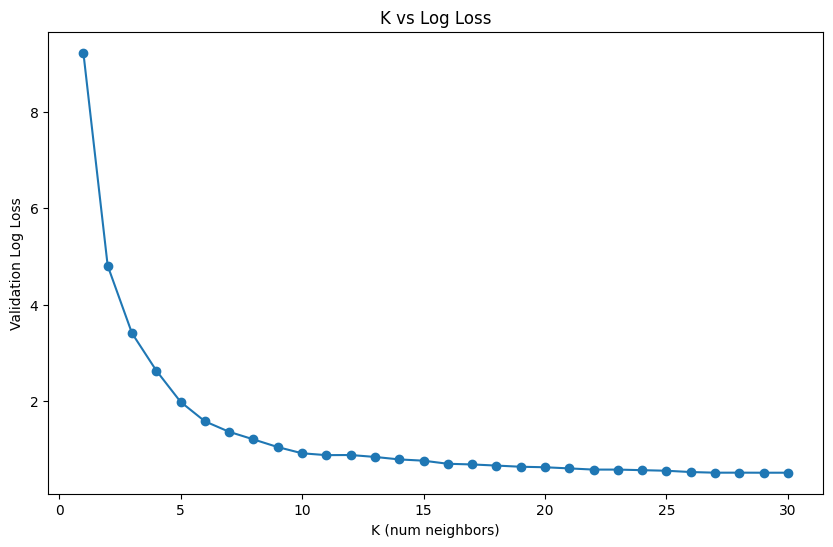

In [22]:
# Columns to keep. in this case we want everything 
cols_2_drop =['']
cols_2_keep = [col for col in X_train.columns  if col not in cols_2_drop]

# Create a pipeline with preprocessing, scaling, and knn
knn_mod = Pipeline(steps=[
    ('preprocessor', preprocessor_no_cat(cols_2_keep)),  
    ('scaler', scaler),   #scale
    ('model', knn_class)
])

#fit the model
knn_mod.fit(X_train,y_train)

# Parameters of pipelines can be set using '__' separated parameter names:
#here we will consider the number of neighbors 
#use model__ since this is a model parameter
param_grid = {
    "model__n_neighbors": list(range(1, 31))
}

#performs the given cv (in our case repeated cv) for each hyperparamteer combo list in param_grid. 
#computes all metrics in scoring list. Ranks them by the refit parameter (in our case logloss) 
search = GridSearchCV(estimator=knn_mod,  param_grid=param_grid, cv=rkf,scoring=scoring, refit='neg_log_loss', n_jobs=-1)
search.fit(X_train, y_train)

#Print KNN Graphic
#convert to df
cv_results = pd.DataFrame(search.cv_results_)
  
# Plot max_features vs score
plt.figure(figsize=(10, 6))
plt.plot(cv_results['param_model__n_neighbors'], -cv_results['mean_test_neg_log_loss'], marker='o')
plt.xlabel('K (num neighbors)')
plt.ylabel('Validation Log Loss')
plt.title('K vs Log Loss')
plt.show()


### Select Final Hyperparameter and Record Results

In [23]:
#Clone Model for later use
knn_mod=search.best_estimator_
knn_mod=clone(knn_mod)

print('KNN:')
print("Grid Search Best Parameter (CV score=%0.3f):" % search.best_score_, search.best_params_)

primary_metric = 'neg_log_loss'
all_results['knn_mod'] = slh.hypertuning_summary(search,scoring,primary_metric) 

#spit out  predictors
print('')
print('Predictors')
print(knn_mod[:-1].fit(X_train,y_train).get_feature_names_out())


KNN:
Grid Search Best Parameter (CV score=-0.519): {'model__n_neighbors': 29}
params: {'model__n_neighbors': 29}
neg_log_loss: -0.5188776539064662
neg_brier_score: -0.16103564640447018
roc_auc: 0.8271971123666039
average_precision: 0.7381588367519016
accuracy: 0.7591947842451943
precision: 0.9207441555119575
recall: 0.25829405162738495
f1: 0.4006860967347722
balanced_accuracy: 0.6237797941752744

Predictors
['CustomerAge' 'HouseholdSize' 'AccountAge' 'LastNewPhone' 'CustServCall'
 'NumVmail' 'NumText' 'NumApps' 'DayMin' 'DayCall' 'DayCharge' 'EveMin'
 'EveCall' 'EveCharge' 'NightMin' 'NightCall' 'NightCharge' 'IntlMin'
 'IntlCall' 'IntlCharge' 'DayData' 'EveData' 'NightData']


## 13) Cart

In [24]:
# Columns to keep. in this case we want everything 
cols_2_drop =['']
cols_2_keep = [col for col in X_train.columns  if col not in cols_2_drop]


# Create a pipeline with preprocessing, scaling, and cart model
cart_mod = Pipeline(steps=[
    ('preprocessor', preprocessor(cols_2_keep)),  #keep vars and one hot encode
    ('model', cart_class)
])

#fit model
cart_mod.fit(X_train, y_train)

# Parameters of pipelines can be set using '__' separated parameter names:
#here we will consider the ccp_alpha 
#use model__ since this is a model parameter
param_grid = {
    "model__ccp_alpha": list(np.logspace(-4,1,20))
}

#performs the given cv (in our case repeated cv) for each hyperparamteer combo list in param_grid. 
#computes all metrics in scoring list. Ranks them by the refit parameter (in our case log lsos) 
search = GridSearchCV(estimator=cart_mod,  param_grid=param_grid, cv=rkf,scoring=scoring, refit='neg_log_loss',n_jobs=-1)
search.fit(X_train, y_train)

cart_mod=search.best_estimator_
cart_mod=clone(cart_mod)

print("Cart Model:")
print("Grid Search Best Parameter (CV score=%0.3f):" % search.best_score_, search.best_params_)

primary_metric = 'neg_log_loss'
all_results['cart_mod'] = slh.hypertuning_summary(search,scoring,primary_metric) 

#spit out  predictors
print('')
print('Predictors')
print(cart_mod[:-1].fit(X_train,y_train).get_feature_names_out())


Cart Model:
Grid Search Best Parameter (CV score=-0.421): {'model__ccp_alpha': np.float64(0.012742749857031334)}
params: {'model__ccp_alpha': np.float64(0.012742749857031334)}
neg_log_loss: -0.42088987927932775
neg_brier_score: -0.13388001498685992
roc_auc: 0.8578306606555196
average_precision: 0.6925064470730561
accuracy: 0.8137428865886991
precision: 0.6811472432341709
recall: 0.7845566778900112
f1: 0.7268798839451149
balanced_accuracy: 0.8058376609789039

Predictors
['Married_divorced' 'Married_married' 'Married_single'
 'PaymentMethod_Automatic' 'PaymentMethod_Check' 'PaymentMethod_Credit'
 'BasePlan_deluxe' 'BasePlan_economy' 'BasePlan_standard' 'IntlPlan_No'
 'IntlPlan_Yes' 'Deal_No' 'Deal_Yes' 'CustomerAge' 'HouseholdSize'
 'AccountAge' 'LastNewPhone' 'CustServCall' 'NumVmail' 'NumText' 'NumApps'
 'DayMin' 'DayCall' 'DayCharge' 'EveMin' 'EveCall' 'EveCharge' 'NightMin'
 'NightCall' 'NightCharge' 'IntlMin' 'IntlCall' 'IntlCharge' 'DayData'
 'EveData' 'NightData']


## 14) Random Forest

In [25]:
# Columns to keep. in this case we want everything 
cols_2_drop =['']
cols_2_keep = [col for col in X_train.columns  if col not in cols_2_drop]

# Create a pipeline with preprocessing and rand forest
rf_mod = Pipeline(steps=[
    ('preprocessor', preprocessor(cols_2_keep)),
    ('model', rf_class)
])

#first fit themodel
rf_mod.fit(X_train,y_train)

#the output to preprocessor is number of variable into th eRF
num_predictors = len(rf_mod['preprocessor'].get_feature_names_out())

# Parameters of pipelines can be set using '__' separated parameter names:
#here we will consider the degree of the polynomial transformer from 1 to 10
param_grid = {
    "model__max_features": list(range(1, num_predictors + 1))
}

#performs the given cv (in our case repeated cv) for each hyperparamteer combo list in param_grid. 
#computes all metrics in scoring list. Ranks them by the refit parameter (in our case RMSE) 
search = GridSearchCV(estimator=rf_mod,  param_grid=param_grid, cv=rkf,scoring=scoring, refit='neg_log_loss',n_jobs=-1)
search.fit(X_train, y_train)

rf_mod=search.best_estimator_
rf_mod=clone(rf_mod)

print("RF Model:")
print("Grid Search Best Parameter (CV score=%0.3f):" % search.best_score_, search.best_params_)

primary_metric = 'neg_log_loss'
all_results['rf_mod'] = slh.hypertuning_summary(search,scoring,primary_metric) 

#spit out  predictors
print('')
print('Predictors')
print(rf_mod[:-1].fit(X_train,y_train).get_feature_names_out())


RF Model:
Grid Search Best Parameter (CV score=-0.291): {'model__max_features': 13}
params: {'model__max_features': 13}
neg_log_loss: -0.290606111337443
neg_brier_score: -0.08665474128467086
roc_auc: 0.9443033917327702
average_precision: 0.8952186056493753
accuracy: 0.8811242550522024
precision: 0.8316943155647467
recall: 0.7833670033670034
f1: 0.8054737340130171
balanced_accuracy: 0.8546778519659876

Predictors
['Married_divorced' 'Married_married' 'Married_single'
 'PaymentMethod_Automatic' 'PaymentMethod_Check' 'PaymentMethod_Credit'
 'BasePlan_deluxe' 'BasePlan_economy' 'BasePlan_standard' 'IntlPlan_No'
 'IntlPlan_Yes' 'Deal_No' 'Deal_Yes' 'CustomerAge' 'HouseholdSize'
 'AccountAge' 'LastNewPhone' 'CustServCall' 'NumVmail' 'NumText' 'NumApps'
 'DayMin' 'DayCall' 'DayCharge' 'EveMin' 'EveCall' 'EveCharge' 'NightMin'
 'NightCall' 'NightCharge' 'IntlMin' 'IntlCall' 'IntlCharge' 'DayData'
 'EveData' 'NightData']


## 15) Boosting

In [26]:
# Columns to keep. in this case we want everything 
cols_2_drop =['']
cols_2_keep = [col for col in X_train.columns  if col not in cols_2_drop]

# Create a pipeline with preprocessing and GBM Model
gbm_mod = Pipeline(steps=[
    ('preprocessor', preprocessor(cols_2_keep)),
    ('model', gbm_class)
])

#first fit themodel
gbm_mod.fit(X_train,y_train)

from scipy.stats import randint, loguniform, uniform

# Define the parameter distribution for the various hyperparameters
param_dist = {
    'model__n_estimators': randint(200, 2000) ,
    'model__learning_rate': loguniform(1e-4, .2) ,
    'model__max_depth': randint(1, 7),
    'model__subsample': uniform(0, 1) 
}


#run the randmo search cv
rnd_search = RandomizedSearchCV(estimator=gbm_mod,  param_distributions=param_dist,  n_iter=5, cv=rkf,
                                scoring=scoring, refit='neg_log_loss', random_state=1533, n_jobs=-1)
rnd_search.fit(X_train, y_train)

gbm_mod=rnd_search.best_estimator_
gbm_mod=clone(gbm_mod)

print("GBM Model:")
print("Grid Search Best Parameter (CV score=%0.3f):" % rnd_search.best_score_, rnd_search.best_params_)

primary_metric = 'neg_log_loss'
all_results['gbm_mod'] = slh.hypertuning_summary(rnd_search,scoring,primary_metric) 

#fit final model
gbm_mod=rnd_search.best_estimator_

#spit out  predictors
print('')
print('Predictors')
print(gbm_mod[:-1].fit(X_train,y_train).get_feature_names_out())


GBM Model:
Grid Search Best Parameter (CV score=-0.265): {'model__learning_rate': np.float64(0.0023512372162975735), 'model__max_depth': 4, 'model__n_estimators': 1449, 'model__subsample': np.float64(0.54073561546288)}
params: {'model__learning_rate': np.float64(0.0023512372162975735), 'model__max_depth': 4, 'model__n_estimators': 1449, 'model__subsample': np.float64(0.54073561546288)}
neg_log_loss: -0.26501260125299114
neg_brier_score: -0.07682578553467653
roc_auc: 0.9545325191652876
average_precision: 0.9160880450885465
accuracy: 0.8993211453152306
precision: 0.877007043655059
recall: 0.791986531986532
f1: 0.8313514509413741
balanced_accuracy: 0.8702870513040005

Predictors
['Married_divorced' 'Married_married' 'Married_single'
 'PaymentMethod_Automatic' 'PaymentMethod_Check' 'PaymentMethod_Credit'
 'BasePlan_deluxe' 'BasePlan_economy' 'BasePlan_standard' 'IntlPlan_No'
 'IntlPlan_Yes' 'Deal_No' 'Deal_Yes' 'CustomerAge' 'HouseholdSize'
 'AccountAge' 'LastNewPhone' 'CustServCall' 'NumV

# 16) Stacking

In [27]:
# Columns to keep. in this case we want everything 
cols_2_drop =['']
cols_2_keep = [col for col in X_train.columns  if col not in cols_2_drop]

# 1) Create Base Models
log_all_stack = Pipeline(steps=[
    ('preprocessor', preprocessor(cols_2_keep)),
    ('scaler', scaler),
    ('model', log_model)
])

# Step 2: Define base models
gbm_stack = Pipeline(steps=[
    ('preprocessor', preprocessor(cols_2_keep)),
    ('model', gbm_class)
])

# Step 2: Define base models
base_models = [
    ('gbm_stack', gbm_stack),
    ('log_all_stack', log_all_stack)
]

# Step 3: Define meta-model
meta_model = LogisticRegression()

# Step 4: Create stacking pipeline
stacking_pipeline = Pipeline([
    ('model', StackingClassifier(
        estimators=base_models,
        final_estimator=meta_model,
        cv=5,  # Cross-validation folds for meta-model training
        n_jobs=-1  # Use all available cores
    ))
])

#first fit themodel
stacking_pipeline.fit(X_train,y_train)

from scipy.stats import randint, loguniform, uniform

# Define the parameter distribution for the various hyperparameters
param_dist = {
    'model__gbm_stack__model__n_estimators': randint(200, 2000),
    'model__gbm_stack__model__learning_rate': loguniform(1e-4, 0.2),
    'model__gbm_stack__model__max_depth': randint(1, 7),
    'model__gbm_stack__model__subsample': uniform(0, 1),
    'model__log_all_stack__model__C': loguniform(1e-3, 1e3)  # Fixed for LogisticRegression
}

#run the random search cv
rnd_search = RandomizedSearchCV(estimator=stacking_pipeline,  param_distributions=param_dist,  n_iter=5, cv=rkf,
                                scoring=scoring, refit='neg_log_loss', random_state=1533, n_jobs=-1)

rnd_search.fit(X_train, y_train)

stacking_mod=rnd_search.best_estimator_
stacking_mod=clone(stacking_mod)

print("Stacking Mod:")
print("Grid Search Best Parameter (CV score=%0.3f):" % rnd_search.best_score_, rnd_search.best_params_)

primary_metric = 'neg_log_loss'
all_results['stacking_mod'] = slh.hypertuning_summary(rnd_search,scoring,primary_metric) 

#spit out  predictors
print('')
print('Predictors')
#print(gbm_mod[:-1].fit(X_train,y_train).get_feature_names_out())


Stacking Mod:
Grid Search Best Parameter (CV score=-0.271): {'model__gbm_stack__model__learning_rate': np.float64(0.012493821088106217), 'model__gbm_stack__model__max_depth': 3, 'model__gbm_stack__model__n_estimators': 1815, 'model__gbm_stack__model__subsample': np.float64(0.5009847640662167), 'model__log_all_stack__model__C': np.float64(2.582090808940492)}
params: {'model__gbm_stack__model__learning_rate': np.float64(0.012493821088106217), 'model__gbm_stack__model__max_depth': 3, 'model__gbm_stack__model__n_estimators': 1815, 'model__gbm_stack__model__subsample': np.float64(0.5009847640662167), 'model__log_all_stack__model__C': np.float64(2.582090808940492)}
neg_log_loss: -0.2712222243943335
neg_brier_score: -0.07656508281148532
roc_auc: 0.9475200213053321
average_precision: 0.8923501653941556
accuracy: 0.9043711072276739
precision: 0.8721836931552007
recall: 0.81672278338945
f1: 0.8421676430782284
balanced_accuracy: 0.880677775875516

Predictors


# Final Model Selection (review results looking at training data only)

In [28]:
#Print final results of all models and sort by log loss
all_results_df = pd.DataFrame.from_dict(all_results, orient='index').sort_values(by='neg_log_loss', ascending=False)
all_results_df = all_results_df.drop('params',axis=1)
print(all_results_df.to_string(index=True, header=True, line_width=2000))


                neg_log_loss  neg_brier_score   roc_auc  average_precision  accuracy  precision    recall        f1  balanced_accuracy
gbm_mod            -0.265013        -0.076826  0.954533           0.916088  0.899321   0.877007  0.791987  0.831351           0.870287
stacking_mod       -0.271222        -0.076565  0.947520           0.892350  0.904371   0.872184  0.816723  0.842168           0.880678
rf_mod             -0.290606        -0.086655  0.944303           0.895219  0.881124   0.831694  0.783367  0.805474           0.854678
ela_cube_mod       -0.323125        -0.096670  0.926683           0.846842  0.864491   0.807108  0.751448  0.776458           0.833916
ela_quad_mod       -0.326384        -0.097717  0.925905           0.845655  0.867583   0.814272  0.752637  0.780719           0.836488
ela_int_mod        -0.339584        -0.104755  0.916279           0.835062  0.860992   0.797198  0.751380  0.771872           0.831340
log_quad_mod       -0.348577        -0.102352  0.922262

# Final Model Threshold Tuning and Generation of Final Confusion Matrix and Other Info

In [29]:
#random state is just an arbitrary integer to get the same results
# Cross-validation using sklearn
rkf_thresh = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=67843)


## Tune Final Model Threshold

In [30]:
# Final Model: the GBM Model based off of log-loss.  Additionally it performs better on balanced acuracy and accuracy 
final_model =stacking_mod

#fit the final model
final_model.fit(X_train,y_train)

####### tune for Balance Accuracy#####
# Initialize the TunedThresholdClassifierCV with store_cv_results=True
tuned_threshold_BA = TunedThresholdClassifierCV(
    estimator=final_model,
    scoring='balanced_accuracy',  # Metric to optimize
    response_method='predict_proba',  # Method to get probabilities
    thresholds=100,  # Number of thresholds to try
    cv=rkf_thresh
)

# Fit the TunedThresholdClassifierCV
tuned_threshold_BA.fit(X_train, y_train)

# Get the optimal threshold
threshold_BA = tuned_threshold_BA.best_threshold_
print('')
print('Balanced Accuracy Tuning:')
print(f'Optimal BA Threshold: {threshold_BA}')

# Extract the cv f1
cv_BA = tuned_threshold_BA.best_score_
print(f'Cross-validated BA Score: {cv_BA}')



Balanced Accuracy Tuning:
Optimal BA Threshold: 0.22099674228738514
Cross-validated BA Score: 0.8975469272366722


## Apply Test Results and Generate Confusion Matrix Using Tuned Threshold

Final Fit Results with Tuned Threshold:
Log-Loss: 0.28200782847013556
Brier score: 0.08342237773718145
ROC-AUC: 0.9414745627980922
PR-AUC: 0.9122728975949315
Accuracy: 0.875
Precision: 0.7469879518072289
Recall: 0.9117647058823529
F1 Score: 0.8211920529801324
Sensitivity: 0.9117647058823529
Specificity: 0.8581081081081081
False positive rate: 0.14189189189189189
False negative rate: 0.08823529411764708
G-Mean: 0.8845296415634987
Balanced accuracy: 0.8849364069952306
Kappa: 0.72655663915979

Classification Report:
              precision    recall  f1-score   support

          No       0.95      0.86      0.90       148
         Yes       0.75      0.91      0.82        68

    accuracy                           0.88       216
   macro avg       0.85      0.88      0.86       216
weighted avg       0.89      0.88      0.88       216

Confusion Matrix


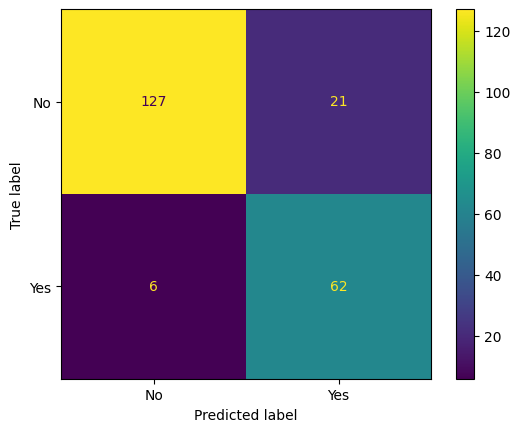

In [31]:
# Final threshold is the Optimal BA Threshold.  This has the highest CV score.

#set final model
final_model_thresh = tuned_threshold_BA

# Make predicted probabilities on the test set
pred_prob = final_model_thresh.predict_proba(X_test)

# Make predicted classes on the test set
pred_class = final_model_thresh.predict(X_test)

#Obtain Results for Test Data after fitting model
print('Final Fit Results with Tuned Threshold:')
slh.compute_binary_class_metric(y_test, pred_prob, pred_class)

#report
print('')
print('Classification Report:')
print(classification_report(y_test, pred_class,target_names=lb.classes_))

#confusion matrix
print('Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_test, pred_class,display_labels=lb.classes_)


# Final Run using all training data and making prediction using test data from CSV file

In [32]:
# Final model fit on all of provided data
final_model_thresh.fit(X,y)

# Make predicted probabilities on the test set
y_final_prob = final_model_thresh.predict_proba(TEST)

# Make predictions on the test set
y_final_pred = final_model_thresh.predict(TEST)


# Log Final Results/Predictions and Send to CSV file

In [33]:
# Print Final Prediction to Prediction CSV File

y_final_prob_results=y_final_prob[:,1]

Probability=[]
Label=[]

for i, prob in enumerate(y_final_prob):
    predicted_class = y_final_pred[i]
    probability = y_final_prob_results[i]
    predicted_class_label = 'Yes' if predicted_class==1 else 'No'
    Probability.append(probability)
    Label.append(predicted_class_label)

final_results=pd.DataFrame({
    'Probability': Probability,
    'Label': Label
})

final_results.to_csv('thompson_cell_plan_canceled_predictions.csv',index=False)
